In [1]:
%cd "C:\Users\khaih\Downloads\Project_2\Data"

C:\Users\khaih\Downloads\Project_2\Data


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from underthesea import word_tokenize, pos_tag, sent_tokenize
import warnings
from gensim import corpora, models, similarities
import jieba
import re
import regex

In [3]:
STOP_WORD_FILE='vietnamese-stopwords.txt'

In [4]:
#LOAD wrong words
file = open('wrong-word.txt', 'r', encoding="utf8")
wrong_lst = file.read().split('\n')
file.close()

In [5]:
with open(STOP_WORD_FILE, 'r', encoding='utf-8') as file:
    stop_words = file.read()

stop_words = stop_words.split('\n')

In [6]:
import pandas as pd
#data = pd.read_csv("pre_data.csv", ,index_col=0)
products= pd.read_csv("ProductRaw.csv",delimiter=',')
reviews=pd.read_csv("ReviewRaw.csv",delimiter=',')
products=products.reset_index()

In [7]:
products.head()

,index,item_id,name,description,rating,price,list_price,brand,group,url,image
0,0,48102821,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,THÔNG TIN CHI TIẾT\nDung lượng pin 300\nThời g...,4.0,77000,300000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-inpods-12-cam-bien-...,https://salt.tikicdn.com/cache/280x280/ts/prod...
1,1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,THÔNG TIN CHI TIẾT\nDung lượng pin 2000mah\nTh...,4.5,132000,750000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-khong-day-f9-true-w...,https://salt.tikicdn.com/cache/280x280/ts/prod...
2,2,299461,Chuột Không Dây Logitech M331 Silent - Hàng Ch...,THÔNG TIN CHI TIẾT\nThương hiệu Logitech\nĐộ p...,4.8,299000,399000,Logitech,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,https://chuot-khong-day-logitech-m331-silent-p...,https://salt.tikicdn.com/cache/280x280/media/c...
3,3,57440329,Loa Bluetooth 5.0 Kiêm Đồng Hồ Báo Thức - [[ 2...,THÔNG TIN CHI TIẾT\nThương hiệu Acome\nXuất xứ...,4.7,149000,350000,Acome,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://loa-bluetooth-5-0-kiem-dong-ho-bao-thu...,https://salt.tikicdn.com/cache/280x280/ts/prod...
4,4,38458616,Tai Nghe Bluetooth Apple AirPods Pro True Wire...,THÔNG TIN CHI TIẾT\nThương hiệu Apple\nXuất xứ...,4.8,5090000,8500000,Apple,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,https://tai-nghe-bluetooth-apple-airpods-pro-t...,https://salt.tikicdn.com/cache/280x280/ts/prod...


In [8]:
reviews.head()

,customer_id,product_id,name,full_name,created_time,rating,title,content
0,709310,10001012,Lân Nguyễn Hoàng,Lân Nguyễn Hoàng,NaN,3,Ko dùng đc thẻ nhớ,Lúcđầu quên thông tin nên dùng 512gb thì ko đc...
1,10701688,10001012,Nguyễn Khánh Hòa,Nguyễn Khánh Hòa,NaN,5,Cực kì hài lòng,"Tiki giao hàng nhanh. Sản phẩm đúng như mô tả,..."
2,11763074,10001012,Toàn Phạm Khánh,Toàn Phạm Khánh,2019-04-17 15:42:45,5,Cực kì hài lòng,"chất lượng camera rõ nét, chống mưa nắng tuyệt..."
3,9909549,10001012,Nguyen Quang Minh,NaN,NaN,5,Rất hài lòng,"Hàng được đóng gói cẩn thận, giao hàng nhanh ,..."
4,1827148,10001012,Phạm Bá Đức,Phạm Bá Đức,NaN,5,Cực kì hài lòng,"dễ cài đặt, chất lượng tốt, chế độ xem hồng ng..."


In [9]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4404 entries, 0 to 4403
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        4404 non-null   int64  
 1   item_id      4404 non-null   int64  
 2   name         4404 non-null   object 
 3   description  4401 non-null   object 
 4   rating       4404 non-null   float64
 5   price        4404 non-null   int64  
 6   list_price   4404 non-null   int64  
 7   brand        4404 non-null   object 
 8   group        4404 non-null   object 
 9   url          4404 non-null   object 
 10  image        4404 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 378.6+ KB


In [10]:
products.isnull().sum()

index          0
item_id        0
name           0
description    3
rating         0
price          0
list_price     0
brand          0
group          0
url            0
image          0
dtype: int64

In [11]:
products.duplicated().sum()

0

In [12]:
products.describe()

,index,item_id,rating,price,list_price
count,4404.000000,4.404000e+03,4404.000000,4.404000e+03,4.404000e+03
mean,2201.500000,3.485994e+07,3.678156,2.747125e+06,3.870596e+06
std,1271.469622,2.568152e+07,1.792263,5.528233e+06,7.877977e+06
min,0.000000,5.466500e+04,0.000000,7.000000e+03,1.200000e+04
25%,1100.750000,1.076859e+07,3.800000,1.500000e+05,2.772500e+05
50%,2201.500000,3.243964e+07,4.500000,4.824440e+05,7.900000e+05
75%,3302.250000,5.630680e+07,4.800000,2.649000e+06,3.507500e+06
max,4403.000000,8.504241e+07,5.000000,6.269000e+07,8.299000e+07


### EDA Products

In [18]:
import pandas as pd
from ydata_profiling import ProfileReport

profile = ProfileReport(
    products, title="Pandas Profiling Report for Products Data"
)

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
products = products.rename(columns={'df_index': 'index'})

In [14]:
most_rating=products.groupby('item_id').size().reset_index(name='counts')
most_rating.sort_values("counts",ascending=False)

,item_id,counts
0,54665,2
31,310917,2
38,356188,2
45,359484,2
1153,11436297,2
...,...,...
1480,15669226,1
1481,15672319,1
1482,15674038,1
1483,15682170,1


In [15]:
rating_frequency = []
entries = products.shape[0]
for i in range(most_rating.counts.nunique()):
    rating_frequency.append(float(most_rating[most_rating['counts'] == i+1]["counts"].count())/entries*100)

In [16]:
numbers = [i for i in range(1, most_rating.counts.nunique()+1)]

df = pd.DataFrame({'number': numbers, 'rating_frequency': rating_frequency})
df

,number,rating_frequency
0,1,98.592189
1,2,0.703906


#### Khoảng 98% các sản phẩm được đánh giá ít nhất một lần.

Text(0.5, 1.0, 'Percentage of the Product Reviews Frequency')

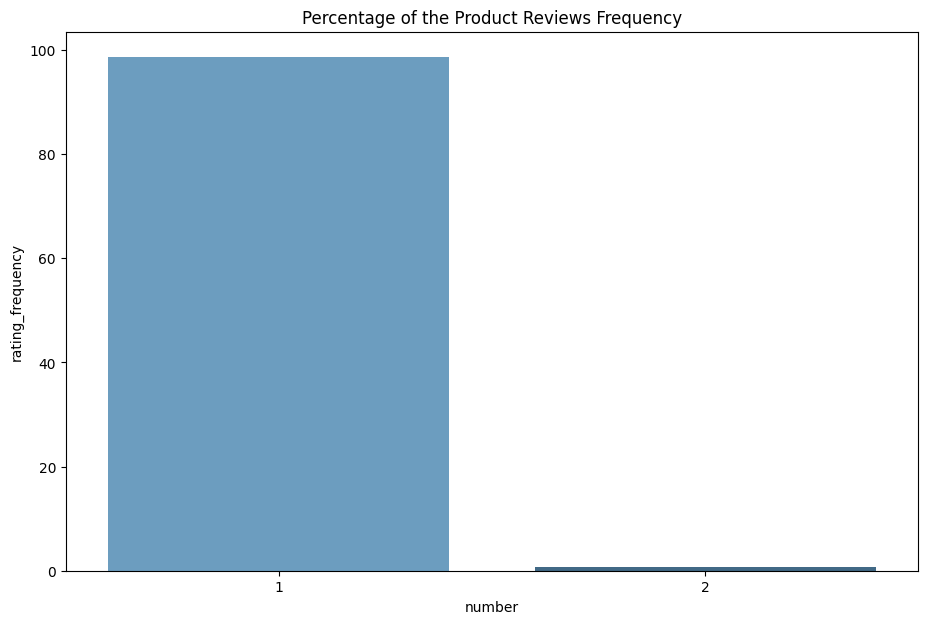

In [17]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(11, 7))
sns.barplot(x="number", y="rating_frequency", data=df, palette="Blues_d")
plt.title("Percentage of the Product Reviews Frequency")

### Các đánh giá từ chủ yếu từ 4.5 đến 5.0 sao. 50% đánh giá của khách hàng từ 4.5 sao trở lên (2392/4404)

C:\Users\khaih\AppData\Local\Temp\ipykernel_4056\1321915105.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Text(0.5, 1.0, 'Top 10 most Interested Price')

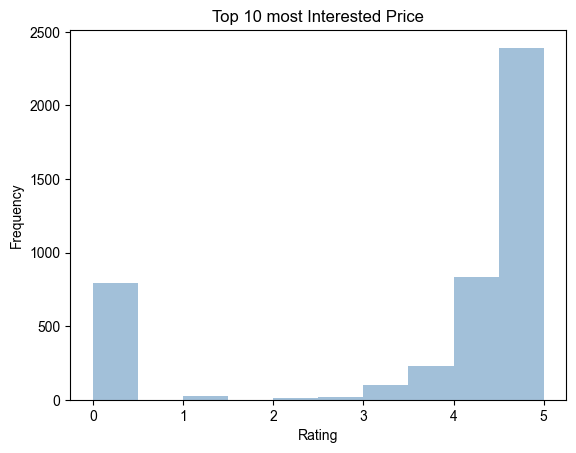

In [18]:
products.hist(column='rating',alpha=0.5,grid=False, histtype='stepfilled', color='steelblue',
         edgecolor='none')
plt.ylabel('Frequency')
plt.xlabel('Rating')
plt.style.use('seaborn-white')
plt.title("Top 10 most Interested Price")

array([[<Axes: title={'center': 'rating'}>]], dtype=object)

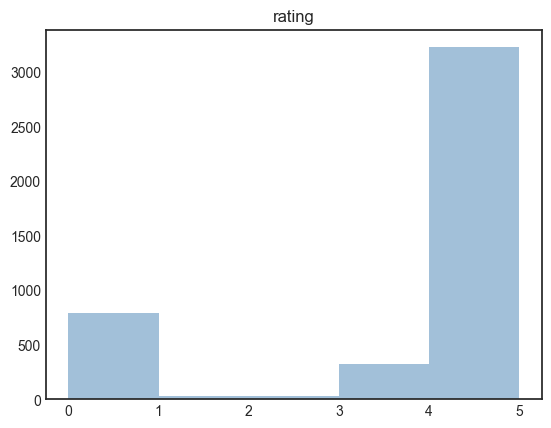

In [19]:
products.hist(column='rating',alpha=0.5,grid=False, histtype='stepfilled', color='steelblue',edgecolor='none', bins=5)

#### Có 521 thương hiệu, nhưng thương hiệu OEM được yêu thích nhất

In [20]:
most_brand=products.groupby('brand').size().reset_index(name='counts')
most_brand.sort_values("counts",ascending=False)

,brand,counts
337,OEM,1121
394,Samsung,199
354,Panasonic,96
277,LG,96
413,Sony,95
...,...,...
253,KTV,1
250,KBVISION-USA,1
247,KAPUSI,1
246,Joy Collection,1


In [21]:
most_brand.sort_values("counts",ascending=False).head(10)

,brand,counts
337,OEM,1121
394,Samsung,199
354,Panasonic,96
277,LG,96
413,Sony,95
285,Logitech,76
506,Yoosee,74
395,SanDisk,69
49,Apple,66
430,TP-Link,65


Text(0.5, 1.0, 'Top 10 most Interested Brands')

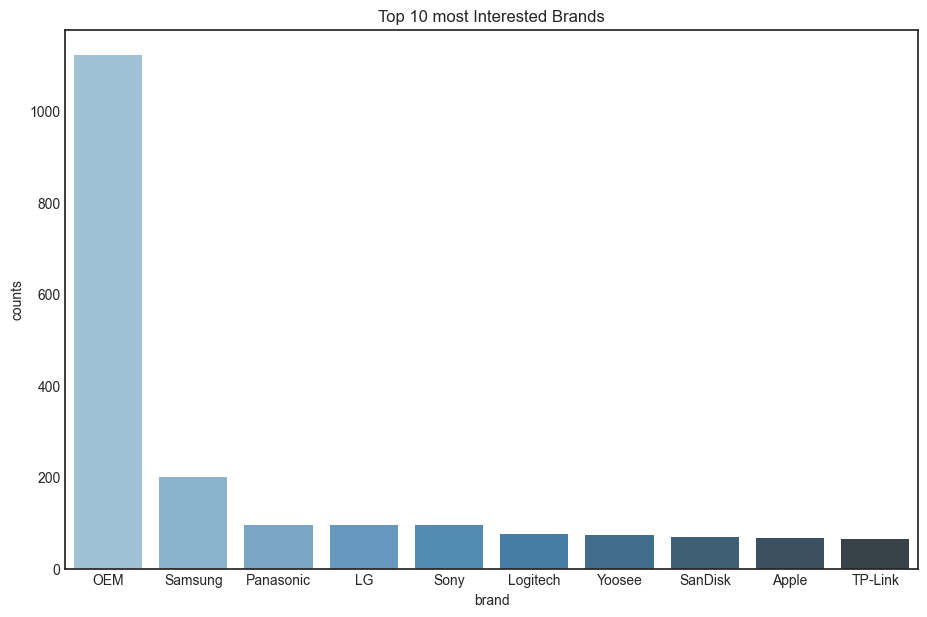

In [22]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(11, 7))
sns.barplot(x="brand", y="counts", data=most_brand.sort_values("counts",ascending=False).head(10), palette="Blues_d")
plt.title("Top 10 most Interested Brands")

In [23]:
most_products=products.groupby(["item_id"]).size().reset_index(name='counts')
most_products.sort_values("counts",ascending=False).head(10)

,item_id,counts
0,54665,2
31,310917,2
38,356188,2
45,359484,2
1153,11436297,2
1157,11449535,2
1048,10680458,2
1200,11921226,2
1232,12404601,2
1239,12477248,2


Text(0.5, 1.0, 'Top 10 most Interested Products')

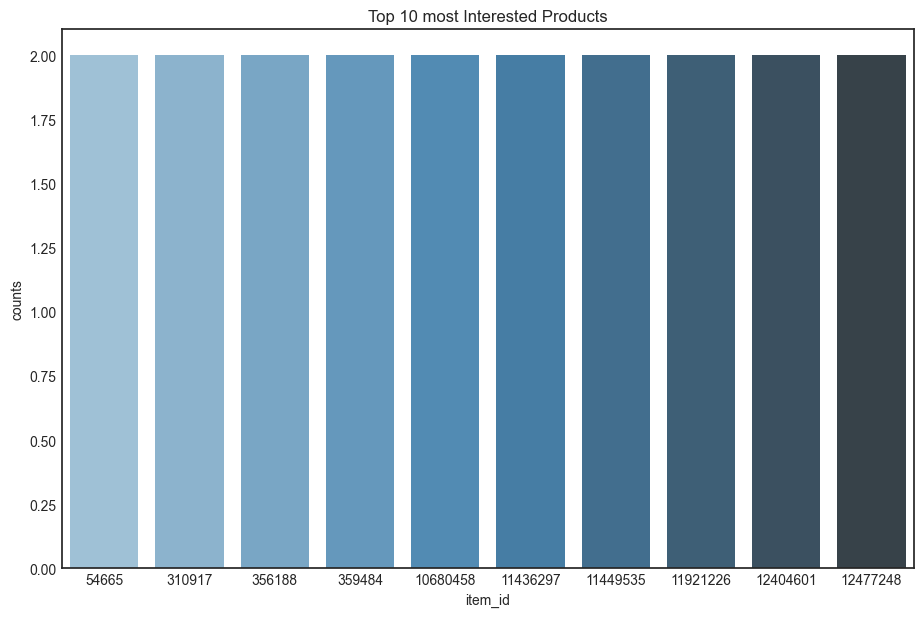

In [24]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(11, 7))
sns.barplot(x="item_id", y="counts", data=most_products.sort_values("counts",ascending=False).head(10), palette="Blues_d")
plt.title("Top 10 most Interested Products")

#### Các sản phẩm dưới 400000 được đánh giá nhiều hơn các sản phẩm trên 400000

In [25]:
most_price=products.groupby('price').size().reset_index(name='counts')
most_price.sort_values("counts",ascending=False)

,price,counts
239,99000,56
213,89000,43
519,299000,38
405,199000,35
187,79000,29
...,...,...
811,755000,1
809,749900,1
807,748999,1
803,728000,1


In [26]:
most_price.loc[(most_price["price"]>400000)].sort_values("counts",ascending=False)

,price,counts
672,499000,17
1179,2990000,16
738,599000,15
826,790000,14
943,1190000,14
...,...,...
1105,2360000,1
1106,2365000,1
1107,2369000,1
1108,2379000,1


In [27]:
most_price.loc[(most_price["price"]<400000)].sort_values("counts",ascending=False)

,price,counts
239,99000,56
213,89000,43
519,299000,38
405,199000,35
597,399000,29
...,...,...
243,100998,1
241,99999,1
236,97996,1
235,97900,1


Text(0.5, 1.0, 'Top 10 most Interested Price')

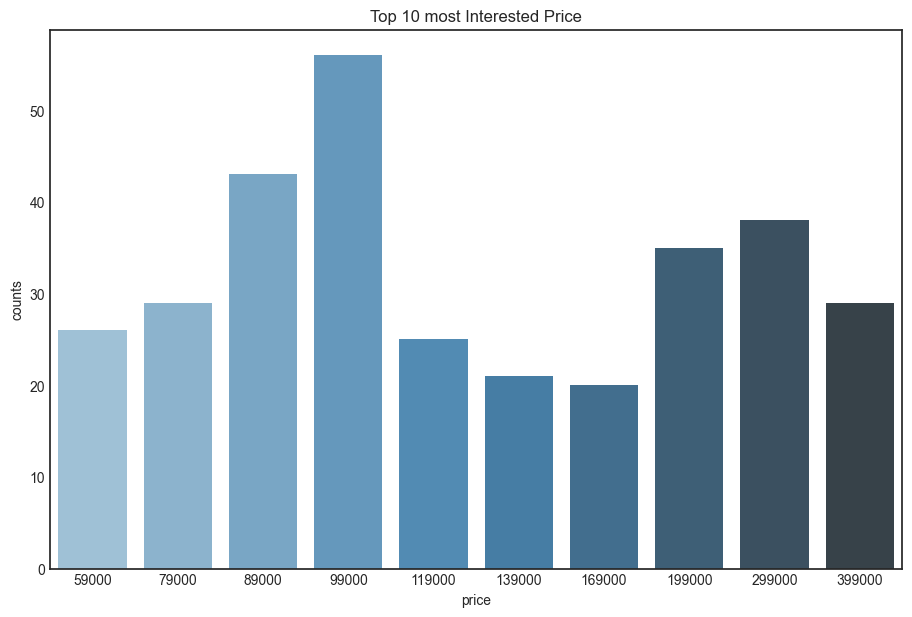

In [28]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(11, 7))
sns.barplot(x="price", y="counts", data=most_price.loc[(most_price["price"]<400000)].sort_values("counts",ascending=False).head(10), palette="Blues_d")
plt.title("Top 10 most Interested Price")

In [29]:
most_rating=products.groupby('rating').size().reset_index(name='counts')
most_rating.sort_values("counts",ascending=False).head(10)

,rating,counts
0,0.0,790
32,5.0,593
30,4.8,447
29,4.7,435
28,4.6,367
27,4.5,329
25,4.3,236
31,4.9,221
22,4.0,204
26,4.4,195


In [30]:
print(products.loc[products["rating"]>=4.5].count()[0])
print(products.count()[0])

2392
4404


####  Các từ khóa về sản phẩm được quan tâm nhiều

In [31]:
from wordcloud import WordCloud

In [32]:
products_name_list = [i for i in products.name]

In [33]:
text = " ".join(name for name in products_name_list)

(-0.5, 399.5, 199.5, -0.5)

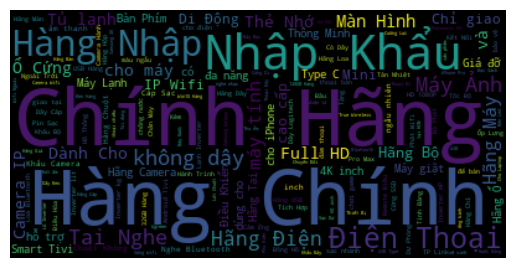

In [34]:
wordcloud = WordCloud(background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
#plt.savefig('word_cloud_interest_products.png', bbox_inches='tight')

### EDA Reviews

In [35]:
reviews.head()

,customer_id,product_id,name,full_name,created_time,rating,title,content
0,709310,10001012,Lân Nguyễn Hoàng,Lân Nguyễn Hoàng,NaN,3,Ko dùng đc thẻ nhớ,Lúcđầu quên thông tin nên dùng 512gb thì ko đc...
1,10701688,10001012,Nguyễn Khánh Hòa,Nguyễn Khánh Hòa,NaN,5,Cực kì hài lòng,"Tiki giao hàng nhanh. Sản phẩm đúng như mô tả,..."
2,11763074,10001012,Toàn Phạm Khánh,Toàn Phạm Khánh,2019-04-17 15:42:45,5,Cực kì hài lòng,"chất lượng camera rõ nét, chống mưa nắng tuyệt..."
3,9909549,10001012,Nguyen Quang Minh,NaN,NaN,5,Rất hài lòng,"Hàng được đóng gói cẩn thận, giao hàng nhanh ,..."
4,1827148,10001012,Phạm Bá Đức,Phạm Bá Đức,NaN,5,Cực kì hài lòng,"dễ cài đặt, chất lượng tốt, chế độ xem hồng ng..."


#### Top 10 khách hàng có nhiều đánh giá

In [36]:
most_customer=reviews.groupby(["customer_id"]).size().reset_index(name='counts')
most_customer.sort_values("counts",ascending=False).head(10)

,customer_id,counts
99761,7737978,52
92181,7280719,40
21618,717732,40
73930,6106142,37
93576,7377207,37
30579,1064154,36
39360,1425077,33
30157,1046981,32
75295,6177374,30
85693,6844844,30


Text(0.5, 1.0, 'Top 10 Customers With The Most Reviews')

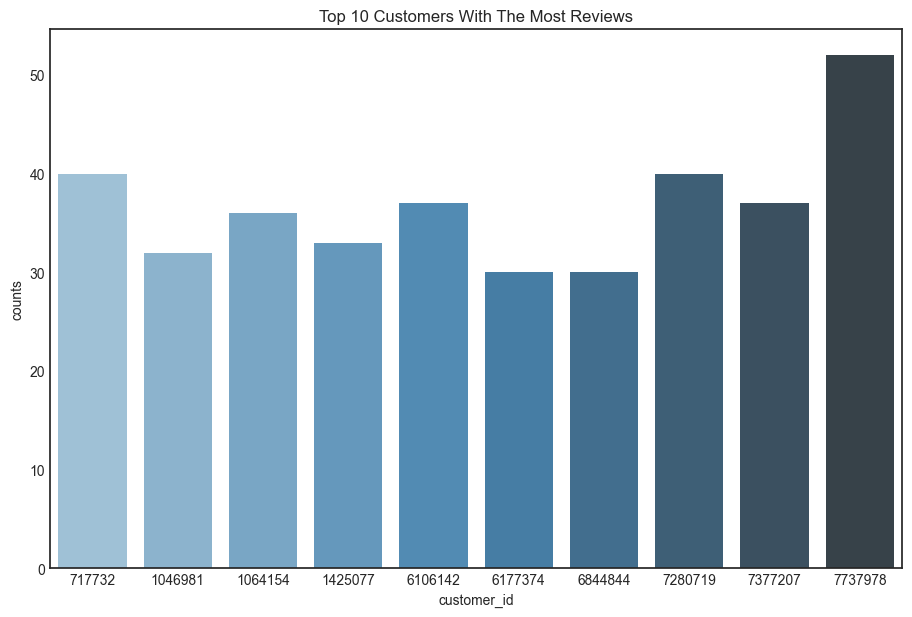

In [37]:
plt.figure(figsize=(11, 7))
sns.barplot(x="customer_id", y="counts", data=most_customer.sort_values("counts",ascending=False).head(10), palette="Blues_d")
plt.title("Top 10 Customers With The Most Reviews")

#### Như phần phân tích về Products, 50% đánh giá đều từ 4.5 sao trở lên. Các từ khóa đánh giá của khách hàng cũng mang nhiều từ khóa tích cực.

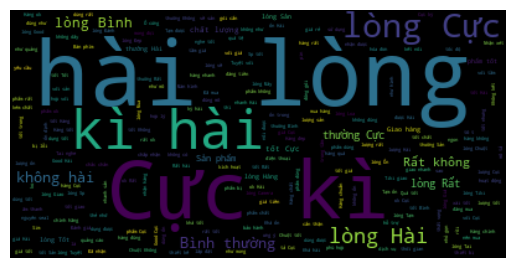

In [38]:
reviews_title_list = [i for i in reviews.title]
text_title = " ".join(str(name) for name in reviews_title_list)
wordcloud = WordCloud(background_color="black").generate(text_title)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('word_cloud_most_reviews.png', bbox_inches='tight')

### Pre-Processing

In [39]:
products["product_content"]=products["name"]+" "+products["description"]

In [40]:
stringcols = products.select_dtypes(include='object').columns
products[stringcols] = products[stringcols].astype("str")

In [41]:
products=products[["index","item_id","rating","product_content"]]

In [42]:
products["product_content_wt"]=products["product_content"].apply(lambda x: word_tokenize(x, format="text"))

In [43]:
products.head(2)

,index,item_id,rating,product_content,product_content_wt
0,0,48102821,4.0,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,Tai_nghe Bluetooth_Inpods 12 - Cảm_biến vân ta...
1,1,52333193,4.5,Tai nghe bluetooth không dây F9 True wireless ...,Tai_nghe bluetooth không dây F9_True wireless ...


In [44]:
product_postag=products["product_content"].apply(lambda x: pos_tag(x))

In [45]:
product_postag[:1].values

array([list([('Tai nghe', 'N'), ('Bluetooth Inpods', 'Np'), ('12', 'M'), ('-', 'CH'), ('Cảm biến', 'N'), ('vân', 'V'), ('tay', 'N'), (',', 'CH'), ('chống', 'V'), ('nước', 'N'), (',', 'CH'), ('màu sắc', 'N'), ('đa dạng', 'A'), ('-', 'CH'), ('5', 'M'), ('màu sắc', 'N'), ('lựa chọn', 'V'), ('THÔNG TIN', 'Np'), ('CHI TIẾT', 'Np'), ('Dung lượng', 'V'), ('pin', 'N'), ('300', 'M'), ('Thời gian', 'N'), ('pin', 'M'), ('-', 'CH'), ('Thời gian', 'N'), ('nghe', 'V'), ('nhạc', 'N'), ('liên tục', 'A'), ('từ', 'E'), ('2.5', 'M'), ('-', 'CH'), ('4', 'M'), ('h', 'N'), ('-', 'CH'), ('Thời gian', 'N'), ('sạc', 'V'), ('đầy', 'A'), ('chỉ', 'R'), ('khoảng', 'N'), ('60', 'M'), ('p', 'N'), ('-', 'CH'), ('Thời gian', 'N'), ('chờ', 'V'), ('lên', 'V'), ('tới', 'T'), ('140', 'M'), ('giờ', 'Nu'), ('Bluetooth', 'Np'), ('5', 'M'), ('Thương hiệu', 'N'), ('OEM', 'Np'), ('Xuất xứ', 'V'), ('thương hiệu', 'N'), ('Trung Quốc', 'Np'), ('Độ', 'Np'), ('nhạy cảm biến', 'V'), ('vân', 'V'), ('tay', 'N'), ('Model', 'Np'), ('i12'

In [46]:
# Chuẩn hóa unicode tiếng việt
def loaddicchar():
    uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
    unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"

    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic
 
# Đưa toàn bộ dữ liệu qua hàm này để chuẩn hóa lại
def convert_unicode(txt):
    dicchar = loaddicchar()
    return regex.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

In [47]:
def process_text(text, wrong_lst):
    document = text.lower()
    document = document.replace("’",'')
    document = regex.sub(r'\.+', ".", document)
    new_sentence =''
    for sentence in sent_tokenize(document):
        # if not(sentence.isascii()):
        # ###### CONVERT EMOJICON
        # sentence = ''.join(emoji_dict[word]+' ' if word in emoji_dict else word for word in list(sentence))
        # ###### CONVERT TEENCODE
        # sentence = ' '.join(teen_dict[word] if word in teen_dict else word for word in sentence.split())
        ###### DEL Punctuation & Numbers
        pattern = r'(?i)\b[a-záàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ]+\b'
        sentence = ' '.join(regex.findall(pattern,sentence))
        ###### DEL wrong words   
        sentence = ' '.join('' if word in wrong_lst else word for word in sentence.split())
        new_sentence = new_sentence+ sentence + '. '                    
    document = new_sentence  
    #print(document)
    ###### DEL excess blank space
    document = regex.sub(r'\s+', ' ', document).strip()
    return document

In [48]:
pre_data_lst=[]
for row in range(len(products)):
    document = products.iloc[row]["product_content_wt"]
    document=  process_text(document,wrong_lst)
    document = convert_unicode(document)
    # document = process_postag_thesea(document)
    # document = remove_stopword(document, stopwords_lst)
    pre_data_lst.append(document)

products['product_content_wt'] = pre_data_lst

In [49]:
products.head()

,index,item_id,rating,product_content,product_content_wt
0,0,48102821,4.0,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,vân chống nước nhạc từ sạc đầy chỉ khoảng chờ ...
1,1,52333193,4.5,Tai nghe bluetooth không dây F9 True wireless ...,không dây wireless có báo kép nhạc giờ giờ . o...
2,2,299461,4.8,Chuột Không Dây Logitech M331 Silent - Hàng Ch...,chuột không dây hàng chính hãng thương hiệu cá...
3,3,57440329,4.7,Loa Bluetooth 5.0 Kiêm Đồng Hồ Báo Thức - [[ 2...,robot hàng chính hãng acome sku chính hãng aco...
4,4,38458616,4.8,Tai Nghe Bluetooth Apple AirPods Pro True Wire...,hàng chính hãng mỹ hộp sạc sạc sku và nhỏ gọn ...


In [50]:
products.to_csv("pre_products_1.csv")